In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

X_train.shape

In [4]:
tf.keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test,y_test) =datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4888 - accuracy: 0.4654
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1402 - accuracy: 0.5990
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0076 - accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9355 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8783 - accuracy: 0.6956
Epoch 6/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8256 - accuracy: 0.7143
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7830 - accuracy: 0.7301
Epoch 8/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7479 - accuracy: 0.7403
Epoch 9/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.7075 - accuracy: 0.7553
Epoch 10/10
1563/1563 [==============================] - 51s

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9469 - accuracy: 0.6904


[0.9468927979469299, 0.6904000043869019]

In [15]:
y_pred=cnn.predict(X_test)
y_pred
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

313/313 [==============================] - 1s 4ms/step


[3, 8, 8, 0, 6]

In [16]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.83      0.78      0.80      1000
           2       0.60      0.57      0.58      1000
           3       0.51      0.48      0.49      1000
           4       0.59      0.71      0.64      1000
           5       0.72      0.48      0.57      1000
           6       0.75      0.78      0.76      1000
           7       0.77      0.72      0.75      1000
           8       0.78      0.81      0.79      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Text(108.22222222222221, 0.5, 'Truth')

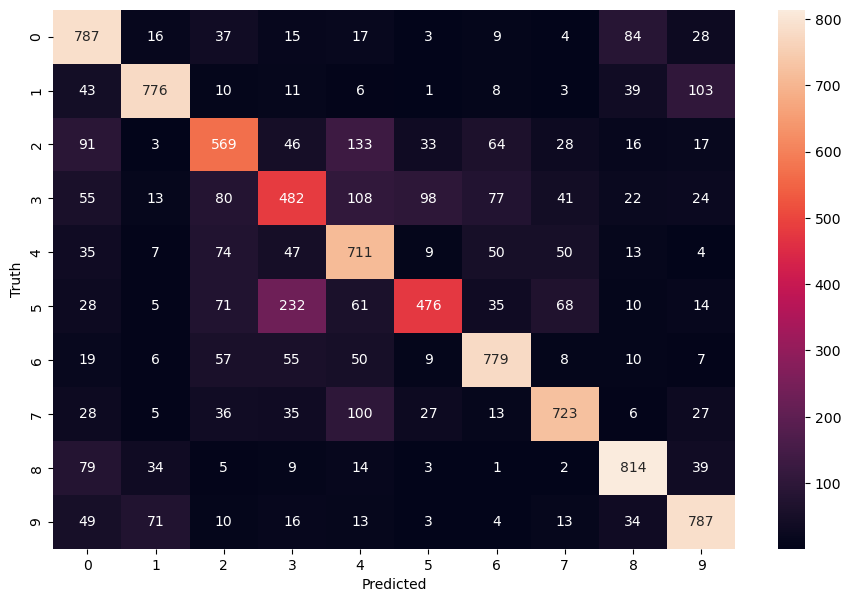

In [20]:
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

plt.figure(figsize = (11,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')